Build a regression model.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.datasets import fetch_california_housing

In [2]:
#load data
df_x=pd.read_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week3_EDA\Statistical-Modelling-Project\citybikes.csv')
df_x.head()


,name,free_bikes,longitude,latitude
0,1 Slough Train Station,27,-0.591562,51.511350
1,2 Burnham Train Station,14,-0.645294,51.523823
2,3 Slough Trading Estate,30,-0.625637,51.516508
3,4 Slough Council,28,-0.607722,51.510629
4,5 Trelawney Avenue,18,-0.554815,51.501937


In [3]:
df_y=pd.read_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week3_EDA\Statistical-Modelling-Project\uniq_merge1.csv')
df_y.head()

,station,name,longitude,latitude,location,rating
0,1 Slough Train Station,Mori Japanese Restaurant,-0.591562,51.51135,"['70 High Street', 'Slough SL1 1EL', 'United K...",4.0
1,1 Slough Train Station,The Chip Box,-0.591562,51.51135,"['39 Stoke Road', 'Slough SL2 5AH', 'United Ki...",4.5
2,1 Slough Train Station,Steakout,-0.591562,51.51135,"['295-297 High Street', 'Slough SL1 1BD', 'Uni...",4.0
3,1 Slough Train Station,Spice 21,-0.591562,51.51135,"['2 Alpha Street North', 'Slough SL1 1RB', 'Un...",4.0
4,1 Slough Train Station,Caribbean Experience,-0.591562,51.51135,"['41 Stoke Road', 'Slough SL2 5AH', 'United Ki...",4.5


In [4]:
# Create a New Dataframe to load df_y and df_x to run regression analysis
df_reg=df_y.set_index("station").join(df_x.set_index("name"),rsuffix="_bikes")
df_reg

,name,longitude,latitude,location,rating,free_bikes,longitude_bikes,latitude_bikes
1 Slough Train Station,Mori Japanese Restaurant,-0.591562,51.511350,"['70 High Street', 'Slough SL1 1EL', 'United K...",4.0,27,-0.591562,51.511350
1 Slough Train Station,The Chip Box,-0.591562,51.511350,"['39 Stoke Road', 'Slough SL2 5AH', 'United Ki...",4.5,27,-0.591562,51.511350
1 Slough Train Station,Steakout,-0.591562,51.511350,"['295-297 High Street', 'Slough SL1 1BD', 'Uni...",4.0,27,-0.591562,51.511350
1 Slough Train Station,Spice 21,-0.591562,51.511350,"['2 Alpha Street North', 'Slough SL1 1RB', 'Un...",4.0,27,-0.591562,51.511350
1 Slough Train Station,Caribbean Experience,-0.591562,51.511350,"['41 Stoke Road', 'Slough SL2 5AH', 'United Ki...",4.5,27,-0.591562,51.511350
...,...,...,...,...,...,...,...,...
8 Yarmouth Road,Tops Pizza,-0.616663,51.519919,"222 Farnham Rd, Slough, SL1 4XE",0.0,11,-0.616663,51.519919
8 Yarmouth Road,German Doner Kebab,-0.616663,51.519919,"248 Farnham Rd, Slough, Berkshire, SL1 4XE",0.0,11,-0.616663,51.519919
8 Yarmouth Road,Exotic Karahi,-0.616663,51.519919,"262-264 Farnham Rd, Colnbrook with Poyle, Berk...",6.1,11,-0.616663,51.519919
9 Bath Road Shopping Centre,Village Fish & Chips,-0.635472,51.520432,"132 Lower Cippenham Lane, Slough, SL1 5EA",0.0,10,-0.635472,51.520432


In [5]:
#Linear Regression
import statsmodels.api as sm
x = df_reg['free_bikes']
y = df_reg['rating']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.067
Date:                Thu, 09 Feb 2023   Prob (F-statistic):              0.303
Time:                        20:51:02   Log-Likelihood:                -325.96
No. Observations:                 150   AIC:                             655.9
Df Residuals:                     148   BIC:                             661.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1603      0.454      2.555      0.0

In [6]:
#CORRELATION
from scipy import stats
stat, p = stats.pearsonr(df_reg['free_bikes'], df_reg['rating'],)
print('%0.60f' % p, stat)

0.303263985249110024078333935904083773493766784667968750000000 0.0846119638544133


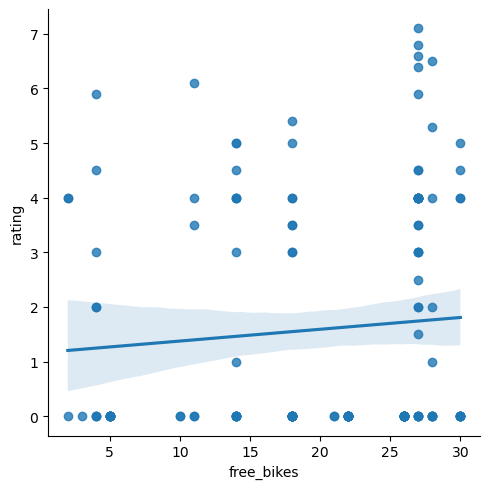

In [7]:
#Linear Regression Line of the model
import seaborn as sns
import matplotlib.pyplot as plt # for visualization
sns.lmplot(x='free_bikes', y='rating', data= df_reg)
plt.show()

Provide model output and an interpretation of the results. 

In [ ]:
Interpreting the Regression Results

1. Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit.
        The model is a poor fit as the value is 0.000

2. const coef is your Y-intercept. It means that if both the rating and free_bikes coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient. In our model it shows that if there are 0 free_bikes the restaurant ratings will be atleast 1.1608.

3. free_bikes coefficient represents the change in the output Y (rating) due to a change of one unit in the rating (everything else held constant).
        In our model when free_bikes increase by one unit, the restaurant ratings can see a positive increase of 0.0215.

4. P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant.
        In our model the p-value is 0.304 which is higher than 5%. The model is statistically insignificant 


HYPOTHESIS 

H0: There is no relationship between free_bikes and rating
H1: There is a relationship between free_bikes and rating

p-value is > 0.05, Accept H0 and Reject H1. There is no significant correlation between the two variables.


# Stretch

How can you turn the regression model into a classification model?